In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset 
churn_df = pd.read_csv("dataset.csv")

In [3]:
#adding column names
churn_df.columns = ["No.","Customer_ID","Surname","Credit_score","Geography","Gender","Age","Tenure","Balance",
                    "Number-of-products","CreditCard","Is-active","Salary","Churn"]
# drop column one inplace of the the row indices
churn_df.drop(churn_df.columns[0], axis=1,inplace=True)

churn_df.head()

,Customer_ID,Surname,Credit_score,Geography,Gender,Age,Tenure,Balance,Number-of-products,CreditCard,Is-active,Salary,Churn
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
3,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [4]:
#Basic datadset info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9999 non-null   int64  
 1   Surname             9999 non-null   object 
 2   Credit_score        9999 non-null   int64  
 3   Geography           9999 non-null   object 
 4   Gender              9999 non-null   object 
 5   Age                 9999 non-null   int64  
 6   Tenure              9999 non-null   int64  
 7   Balance             9999 non-null   float64
 8   Number-of-products  9999 non-null   int64  
 9   CreditCard          9999 non-null   int64  
 10  Is-active           9999 non-null   int64  
 11  Salary              9999 non-null   float64
 12  Churn               9999 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.6+ KB


In [5]:
#basic set statistics
churn_df.describe()


,Customer_ID,Credit_score,Age,Tenure,Balance,Number-of-products,CreditCard,Is-active,Salary,Churn
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000
mean,1.569095e+07,650.531953,38.921492,5.013101,76493.538642,1.530253,0.705471,0.515052,100090.114004,0.20362
std,7.193758e+04,96.657618,10.488286,2.892162,62395.836502,0.581659,0.455854,0.499798,57513.367468,0.40271
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.00000
50%,1.569074e+07,652.000000,37.000000,5.000000,97208.460000,1.000000,1.000000,1.000000,100187.430000,0.00000
75%,1.575324e+07,718.000000,44.000000,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.00000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


In [6]:
#missing values in the set
churn_df.isnull().sum()

Customer_ID           0
Surname               0
Credit_score          0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
Number-of-products    0
CreditCard            0
Is-active             0
Salary                0
Churn                 0
dtype: int64

clean set and data is in correct format for analysis

In [7]:
#check the column dtype
churn_df.dtypes

Customer_ID             int64
Surname                object
Credit_score            int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
Number-of-products      int64
CreditCard              int64
Is-active               int64
Salary                float64
Churn                   int64
dtype: object

1. credit score and gender

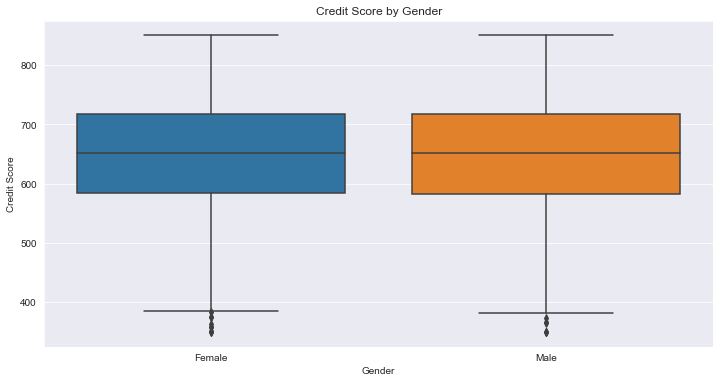

In [8]:

sns.set_style('darkgrid')

plt.figure(figsize=(12, 6)) # increase the figure size

sns.boxplot(data=churn_df, x='Gender', y='Credit_score')

plt.title('Credit Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.show()

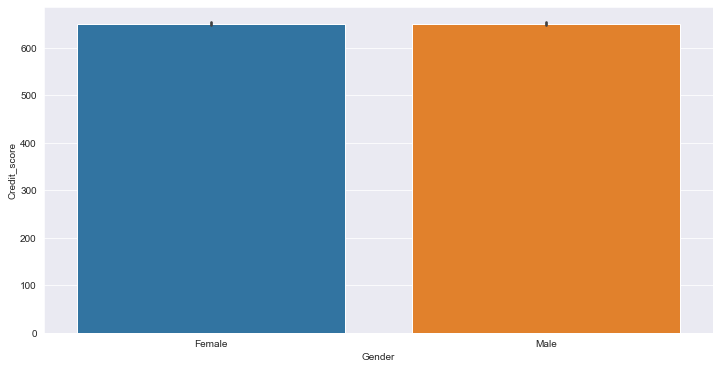

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=churn_df,x="Gender",y="Credit_score")
plt.show()

from the above males and females have equal likely chances of leaving the institution

In [10]:
#compute churn values
churn_df["Churn"].value_counts()

0    7963
1    2036
Name: Churn, dtype: int64

In [11]:
#group Tenure and churn
churn_df.groupby('Churn')['Tenure'].mean()


Churn
0    5.033279
1    4.934185
Name: Tenure, dtype: float64

This suggests that customers who churned had slightly shorter tenures on average compared to customers who did not churn.
This implies that the customers with less balances are likely to leave the institution. 

<AxesSubplot:xlabel='Churn', ylabel='Balance'>

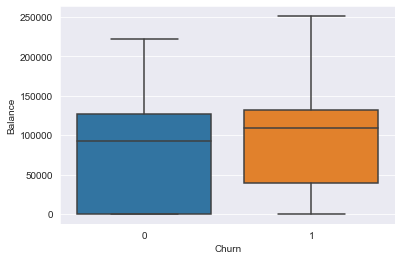

In [12]:
sns.boxplot(data=churn_df,x="Churn",y="Balance")

HOW AGE AFFECTS CHURN PROBABILITY

<AxesSubplot:xlabel='Churn', ylabel='Age'>

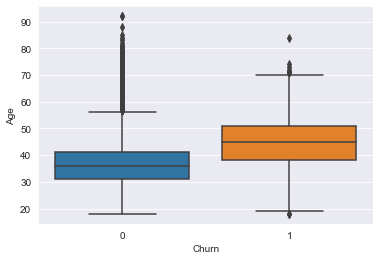

In [13]:

sns.boxplot(data=churn_df,x="Churn",y="Age")

In [14]:
churn_df.groupby("Churn")["Age"].mean()

Churn
0    37.408389
1    44.839391
Name: Age, dtype: float64

This implies that those with age 37 and below are most likely to churn while those with age 44 and above 
are likely to retain their services at the institution

How does having a credit card and the respective balances affect churning 

In [15]:

churn_df.groupby("CreditCard")["Balance"].mean()

CreditCard
0    77920.787552
1    75897.671327
Name: Balance, dtype: float64

In [16]:
churn_df.groupby("CreditCard")["Churn"].value_counts()

CreditCard  Churn
0           0        2332
            1         613
1           0        5631
            1        1423
Name: Churn, dtype: int64

From the above it is clear that the highest number of those who churn don't have credit cards,and there is also a good number of those with credit cards churning this, seems to be affected by the respective balances.

HOW DOES THE SALARY AFFECT THE CUSTOMER CHURNING LEVELS

In [17]:
churn_df.groupby("Churn")["Salary"].mean()

Churn
0     99738.391772
1    101465.734897
Name: Salary, dtype: float64

In [18]:
churn_df.groupby("CreditCard")["Salary"].mean()

CreditCard
0    100974.397711
1     99720.931198
Name: Salary, dtype: float64

In [19]:
churn_df.groupby(["Gender","CreditCard","Churn"])["Salary"].mean().unstack()

Churn                          0              1
Gender CreditCard                              
Female 0           100682.701718  107182.694157
       1            99451.992787  101116.749987
Male   0            99985.062264   99000.246617
       1            99555.565504   99834.059825

In [20]:
churn_df.groupby("Gender")["Balance"].mean()


Gender
Female    75676.026860
Male      77173.974506
Name: Balance, dtype: float64

In [21]:
churn_df["Balance"].max()

250898.09

In [22]:
churn_df["Gender"].value_counts()

Male      5457
Female    4542
Name: Gender, dtype: int64

In [23]:
churn_df.groupby(["Gender","Is-active"])["Churn"].value_counts().unstack()


Churn                0    1
Gender Is-active           
Female 0          1534  725
       1          1870  413
Male   0          2013  577
       1          2546  321

From the above males are less active and hence constitute the highest number of customers who churn at 2013 as compared to their female counterparts standing at 1534.

In [24]:
#convert gender to a numerical value
#0:female, 1 :male

#using label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit and transform the categorical column into numerical values
churn_df['Gender'] = le.fit_transform(churn_df['Gender'])
churn_df.head()


,Customer_ID,Surname,Credit_score,Geography,Gender,Age,Tenure,Balance,Number-of-products,CreditCard,Is-active,Salary,Churn
0,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
1,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
2,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
3,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
4,15574012,Chu,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1


In [25]:
churn_df["Geography"].value_counts()

France     5013
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [26]:
churn_df.groupby("Geography")["Churn"].value_counts()

Geography  Churn
France     0        4204
           1         809
Germany    0        1695
           1         814
Spain      0        2064
           1         413
Name: Churn, dtype: int64

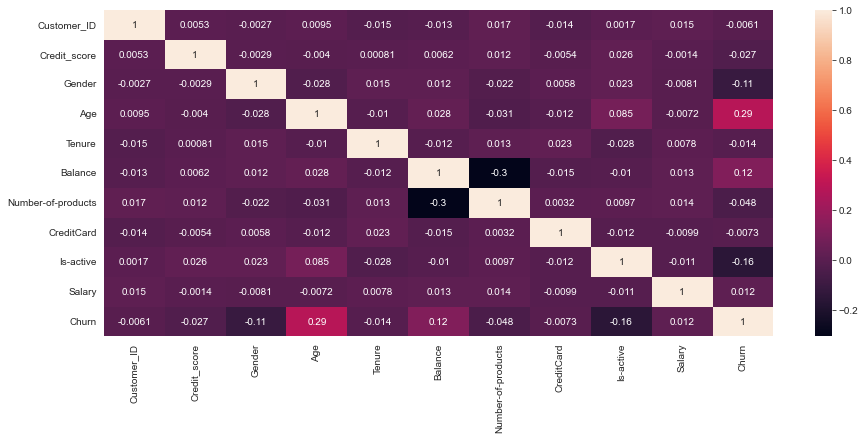

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(churn_df.corr(),annot=True)
plt.show()

In [28]:
# build a predictive model to predict the probability of a certain customer churning and not chunning

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from  sklearn.metrics import confusion_matrix,classification_report

In [29]:
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit and transform the categorical column into numerical values
churn_df['Geography'] = le.fit_transform(churn_df['Geography'])
churn_df.head()

,Customer_ID,Surname,Credit_score,Geography,Gender,Age,Tenure,Balance,Number-of-products,CreditCard,Is-active,Salary,Churn
0,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
1,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
2,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
3,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
4,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1


In [30]:
#split the data into training and testing
X = churn_df.drop(["Customer_ID","Churn","Surname"], axis=1)

y = churn_df["Churn"]


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print("Train_size:",X_train.shape,y_train.shape)
print("Test_size:",X_test.shape,y_test.shape)

Train_size: (7999, 10) (7999,)
Test_size: (2000, 10) (2000,)


In [33]:
#fit a logistic regression model to the data
Logreg = LogisticRegression()
Logreg.fit(X_train,y_train)

LogisticRegression()

In [34]:
churn_hat = Logreg.predict(X_test)

In [35]:
churn_hat

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
accuracy = accuracy_score(y_test,churn_hat)
print("Accuracy:",accuracy*100)

Accuracy: 80.45


In [37]:
#Fit a decision tree classier
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [38]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
yhat = model_tree.predict(X_test)
yhat

array([0, 1, 1, ..., 1, 1, 0])

In [41]:
model_accuracy = accuracy_score(y_test,yhat)
model_accuracy*100

78.45

In [42]:
# fit a randoForest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_hat = model_rf.predict(X_test)
y_hat

array([0, 1, 1, ..., 1, 1, 0])

In [45]:
Rf_accuracy = accuracy_score(y_test,y_hat)
Rf_accuracy*100

86.1

In [ ]:
#build SVM model

X = churn_df.drop(['Customer_ID', 'Churn', 'Surname'], axis=1)
y = churn_df['Churn']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model using the training dataset
svm_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the model using accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

cr = classification_report(y_test, y_pred)
print('Classification report:\n', cr)


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
bestscore=SelectKBest(score_func=chi2,k=6)
fit=bestscore.fit(X,y)
dfscore=pd.DataFrame(fit.scores_)
dfscore

,0
0,1.049427e+02
1,1.197465e+01
2,5.134535e+01
3,2.300399e+03
4,3.176057e+00
5,7.182671e+06
6,5.019143e+00
7,1.555274e-01
8,1.185476e+02
9,4.833525e+04


In [48]:
dfNew = pd.DataFrame(X.columns)
dfNew

,0
0,Credit_score
1,Geography
2,Gender
3,Age
4,Tenure
5,Balance
6,Number-of-products
7,CreditCard
8,Is-active
9,Salary


In [49]:
#combine the two to clearly get the correct scores attributed
X_scores=pd.concat([dfNew,dfscore],axis=1)
#renaming the columns
X_scores.columns=['Attribute','scores']
X_scores

,Attribute,scores
0,Credit_score,1.049427e+02
1,Geography,1.197465e+01
2,Gender,5.134535e+01
3,Age,2.300399e+03
4,Tenure,3.176057e+00
5,Balance,7.182671e+06
6,Number-of-products,5.019143e+00
7,CreditCard,1.555274e-01
8,Is-active,1.185476e+02
9,Salary,4.833525e+04


In [60]:
print(X_scores.nlargest(7,'scores'))

      Attribute        scores
5       Balance  7.182671e+06
9        Salary  4.833525e+04
3           Age  2.300399e+03
8     Is-active  1.185476e+02
0  Credit_score  1.049427e+02
2        Gender  5.134535e+01
1     Geography  1.197465e+01


Now these are the attributes we are going to use to fit the model

In [61]:
new_df = churn_df[["Balance","Salary","Age","Is-active","Credit_score","Gender","Geography"]]
new_df.head()

,Balance,Salary,Age,Is-active,Credit_score,Gender,Geography
0,83807.86,112542.58,41,1,608,0,2
1,159660.80,113931.57,42,0,502,0,0
2,0.00,93826.63,39,0,699,0,0
3,125510.82,79084.10,43,1,850,0,2
4,113755.78,149756.71,44,0,645,1,2


In [62]:
#split the set into training and testing
X_train1,X_test1,y_train1,y_test1 = train_test_split(new_df,y,test_size=0.2)

In [63]:
print("Train_size:",X_train1.shape,y_train1.shape)
print("Test_size:",X_test1.shape,y_test1.shape)

Train_size: (7999, 7) (7999,)
Test_size: (2000, 7) (2000,)


In [64]:
#fit this to the logistic regression model 
LogR = LogisticRegression()
LogR.fit(X_train1,y_train1)

LogisticRegression()

In [66]:
Y_hat = LogR.predict(X_test1)
Y_hat

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
new_accuracy = accuracy_score(y_test1,Y_hat)
new_accuracy*100

78.55

In [72]:
#fit this to the Randomforest classier
new_RF = RandomForestClassifier()
new_RF.fit(X_train1,y_train1)

YHAT = new_RF.predict(X_test1)

new_RF_acc = accuracy_score(y_test1,YHAT)
new_RF_acc*100

82.85

From the above model analysis its clear that there are 8 key performance predictors in the set that can successfully predict the probability of the customer churn ,However this can be improved while feeding the model with more data